In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [2]:
chinaCPI = pd.read_excel('cpiChina.xls')
usCPI = pd.read_excel('cpiUS.xls')
indoCPI = pd.read_excel('inflasiIndonesia.xlsx', usecols = "B:C", skiprows = [1,2,3,4])

In [3]:
chinaCPI.drop(chinaCPI.index[0:10], axis = 0, inplace= True)
chinaCPI.reset_index(inplace=True)
chinaCPI.drop(['index'], axis = 1, inplace= True)
chinaCPI.rename(columns = {'FRED Graph Observations': 'Date', 'Unnamed: 1' : 'chCPI'}, inplace = True)
chinaCPI.head(5)

,Date,chCPI
0,2002-01-01 00:00:00,71.061305
1,2002-02-01 00:00:00,71.84298
2,2002-03-01 00:00:00,70.909021
3,2002-04-01 00:00:00,70.696294
4,2002-05-01 00:00:00,70.484205


In [4]:
Scale = StandardScaler()
a = chinaCPI['chCPI']
a1 = Scale.fit_transform(a[:,np.newaxis])

/var/folders/cp/6992njhn3_3f29d2s3qz63040000gn/T/ipykernel_1086/1099100150.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  a1 = Scale.fit_transform(a[:,np.newaxis])


In [5]:
cpiChina = pd.DataFrame(a1)
a2 = pd.concat([chinaCPI,cpiChina], axis = 1)
a2.rename(columns = {0 : 'chCPINorm'}, inplace = True)
a2.head(5)

,Date,chCPI,chCPINorm
0,2002-01-01 00:00:00,71.061305,-1.510174
1,2002-02-01 00:00:00,71.84298,-1.452627
2,2002-03-01 00:00:00,70.909021,-1.521385
3,2002-04-01 00:00:00,70.696294,-1.537046
4,2002-05-01 00:00:00,70.484205,-1.552660


In [6]:
def chDailyData():
    y = a2['chCPINorm']
    x_value = [1,30]
    i = 0
    y_new = []
    for i in range(len(y)-1):
        a, b = [y.iloc[i], y.iloc[i+1]]
        y_value = [a,b]
        i = i+1
        for j in range(28):
            y_new.append(np.interp(j+1, x_value, y_value))
    return(y_new)
                
        

In [7]:
chCPIDaily = pd.DataFrame(chDailyData())

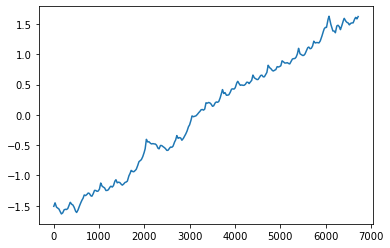

In [8]:
plt.plot(chCPIDaily)

#### <center> US CPI (Inflation)

In [9]:
usCPI.drop(usCPI.index[0:10], axis = 0, inplace= True)
usCPI.reset_index(inplace=True)
usCPI.drop(['index'], axis = 1, inplace= True)
usCPI.rename(columns = {'FRED Graph Observations': 'Date', 'Unnamed: 1' : 'usCPI'}, inplace = True)

In [10]:
b = usCPI['usCPI']
b1 = Scale.fit_transform(b[:, np.newaxis])
cpiUS = pd.DataFrame(b1)
b2 = pd.concat([usCPI,cpiUS], axis = 1)
b2.rename(columns = {'usCPI':'usCPI', 0: 'usCPINorm'}, inplace = True)
b2.head(5)

/var/folders/cp/6992njhn3_3f29d2s3qz63040000gn/T/ipykernel_1086/1702642358.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  b1 = Scale.fit_transform(b[:, np.newaxis])


,Date,usCPI,usCPINorm
0,2002-01-01 00:00:00,1.142204,-0.719529
1,2002-02-01 00:00:00,1.137656,-0.722680
2,2002-03-01 00:00:00,1.475596,-0.488581
3,2002-04-01 00:00:00,1.639344,-0.375149
4,2002-05-01 00:00:00,1.181767,-0.692123


In [11]:
b2.shape

(241, 3)

In [12]:
def usDailyData():
    y = b2['usCPINorm']
    x_value = [1,30]
    i = 0
    y_new = []
    for i in range(len(y)-1):
        a, b = [y.iloc[i], y.iloc[i+1]]
        y_value = [a,b]
        i = i+1
        for j in range(28):
            y_new.append(np.interp(j+1, x_value, y_value))
    return(y_new)

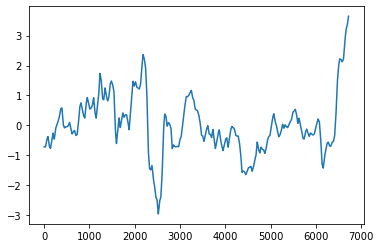

In [13]:
usCPIDaily = pd.DataFrame(usDailyData())
plt.plot(usCPIDaily)

In [14]:
len(usCPIDaily)

6720

#### <center> Combined Monthly CPI Graph

In [15]:
X = a2['Date']
Y1 = a2['chCPINorm']
Y2 = b2['usCPINorm']

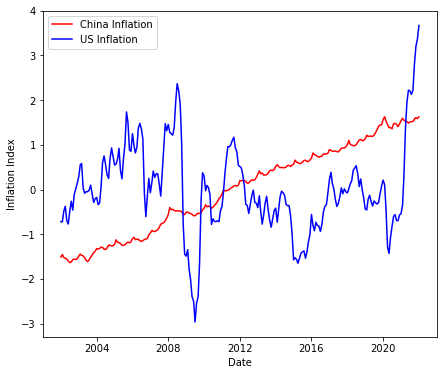

In [16]:
plt.figure(figsize = (24,6))
plt.subplot(131)
plt.plot(X, Y1, label = 'China Inflation', color = 'r')
plt.plot(X, Y2, label = 'US Inflation', color = 'b')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.legend()
plt.show()

#### <center> Combined Daily CPI Graph

In [17]:
usCPIDaily.head(3)

,0
0,-0.719529
1,-0.719638
2,-0.719746


#### <center> Indonesian CPI (Monthly)

In [18]:
indoCPI = indoCPI.iloc[::-1]
indoCPI['Unnamed: 2'] = indoCPI['Unnamed: 2'].str.rstrip('%').astype('float') / 100.0
indoCPI.head(3)

,Unnamed: 1,Unnamed: 2
229,Desember 2002,0.0000
228,Januari 2003,0.0868
227,Februari 2003,0.0760


In [19]:
c = indoCPI['Unnamed: 2']
c1 = Scale.fit_transform(c[:, np.newaxis])

/var/folders/cp/6992njhn3_3f29d2s3qz63040000gn/T/ipykernel_1086/1303841877.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  c1 = Scale.fit_transform(c[:, np.newaxis])


In [20]:
c2 = pd.DataFrame(c1)
c3 = pd.concat([indoCPI,c2], axis = 1)

In [21]:
c3.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2' : 'indoCPI', 0:'indoCPINorm'}, inplace = True)

In [22]:
c3

,Date,indoCPI,indoCPINorm
229,Desember 2002,0.0000,-1.044976
228,Januari 2003,0.0868,-1.135881
227,Februari 2003,0.0760,-1.171070
226,Maret 2003,0.0717,-1.197462
225,April 2003,0.0762,-1.215056
...,...,...,...
4,September 2021,0.0160,0.550263
3,Oktober 2021,0.0166,0.418304
2,November 2021,0.0175,0.544398
1,Desember 2021,0.0187,0.861100


#### <center> Indonesian CPI (Daily)

In [23]:
def idDailyData():
    y = c3['indoCPINorm']
    x_value = [1,30]
    i = 0
    y_new = []
    for i in range(len(y)-1):
        a, b = [y.iloc[i], y.iloc[i+1]]
        y_value = [a,b]
        i = i+1
        for j in range(28):
            y_new.append(np.interp(j+1, x_value, y_value))
    return(y_new)

In [24]:
idCPIDaily = pd.DataFrame(idDailyData())
idCPIDaily.head(5)

,0
0,-1.044976
1,-1.048110
2,-1.051245
3,-1.054379
4,-1.057514


In [25]:
len(idCPIDaily)

6412

#### <center> OIL PRICE

In [26]:
CL = yf.Ticker("CL=F")
oil = CL.history(start = '2002-01-01', end = '2022-01-01', period = '1d')
oil = pd.DataFrame(oil)

In [27]:
oil.drop(['Open','High','Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)
oil.reset_index(inplace = True)

In [28]:
oil['Date'] = pd.to_datetime(oil['Date'])

In [29]:
oil.head(5)

,Date,Close,Volume
0,2001-12-31,19.840000,36403
1,2002-01-02,21.010000,69560
2,2002-01-03,20.370001,64010
3,2002-01-04,21.620001,84832
4,2002-01-07,21.480000,64080


In [37]:
oil.shape

(5028, 3)

In [30]:
#oil.to_excel('oilPriceDaily.xlsx', index = False, engine = 'xlsxwriter')

#### <center> STOCKS

* Tier 1: 
['BBCA.JK','BBNI.JK','BMRI.JK', 'ADHI.JK','ADRO.JK','ANTM.JK','ASII.JK','ICBP.JK','INDF.JK', 'TLKM.JK']

* Tier 2:
['JSMR.JK','KLBF.JK', 'BUMI.JK', 'GGRM.JK', 'UNTR.JK', 'UNVR.JK','WIKA.JK','WSKT.JK', 'SMGR.JK', 'PTPP.JK', 'INCO.JK','PGAS.JK'

In [31]:
lists = ['BBCA.JK','BBNI.JK','BMRI.JK','BBRI.JK','ADHI.JK','ADRO.JK','ANTM.JK','ASII.JK','ICBP.JK','INDF.JK', 'TLKM.JK','JSMR.JK','KLBF.JK', 'BUMI.JK', 'GGRM.JK', 'UNTR.JK', 'UNVR.JK','WIKA.JK','WSKT.JK', 'SMGR.JK', 'PTPP.JK', 'INCO.JK','PGAS.JK','UNVR.JK','PWON.JK','BRPT.JK','EXCL.JK', 'HMSP.JK']
tit = yf.download(tickers=lists, start = '2002-01-01', end = '2022-01-01', period = '1d')

[*********************100%***********************]  27 of 27 completed


In [32]:
stock = pd.DataFrame(tit)
stock.drop(['Adj Close','Open','High','Low'],axis = 1, inplace = True)

In [33]:
stock.fillna(0, inplace=True)
stock.isnull().sum()

Close   ADHI.JK    0
        ADRO.JK    0
        ANTM.JK    0
        ASII.JK    0
        BBCA.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BMRI.JK    0
        BRPT.JK    0
        BUMI.JK    0
        EXCL.JK    0
        GGRM.JK    0
        HMSP.JK    0
        ICBP.JK    0
        INCO.JK    0
        INDF.JK    0
        JSMR.JK    0
        KLBF.JK    0
        PGAS.JK    0
        PTPP.JK    0
        PWON.JK    0
        SMGR.JK    0
        TLKM.JK    0
        UNTR.JK    0
        UNVR.JK    0
        WIKA.JK    0
        WSKT.JK    0
Volume  ADHI.JK    0
        ADRO.JK    0
        ANTM.JK    0
        ASII.JK    0
        BBCA.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BMRI.JK    0
        BRPT.JK    0
        BUMI.JK    0
        EXCL.JK    0
        GGRM.JK    0
        HMSP.JK    0
        ICBP.JK    0
        INCO.JK    0
        INDF.JK    0
        JSMR.JK    0
        KLBF.JK    0
        PGAS.JK    0
        PTPP.JK    0
        PWON.

In [34]:
stock.head(3)

Close                                                      \
           ADHI.JK ADRO.JK ANTM.JK     ASII.JK BBCA.JK BBNI.JK BBRI.JK   
Date                                                                     
2002-01-01     0.0     0.0     0.0  150.697388     0.0     0.0     0.0   
2002-01-02     0.0     0.0     0.0  144.901321     0.0     0.0     0.0   
2002-01-03     0.0     0.0     0.0  144.901321     0.0     0.0     0.0   

                                    ...  Volume                          \
           BMRI.JK BRPT.JK BUMI.JK  ... KLBF.JK PGAS.JK PTPP.JK PWON.JK   
Date                                ...                                   
2002-01-01     0.0     0.0    50.0  ...     0.0     0.0     0.0     0.0   
2002-01-02     0.0     0.0    50.0  ...     0.0     0.0     0.0     0.0   
2002-01-03     0.0     0.0    50.0  ...     0.0     0.0     0.0     0.0   

                                                                
           SMGR.JK TLKM.JK     UNTR.JK UNVR.JK WIKA.JK WSKT.JK  
Date                                                            
2002-01-01     0.0     0.0         0.0     0.0     0.0     0.0  
2002-01-02     0.0     0.0  11191385.0     0.0     0.0     0.0  
2002-01-03     0.0     0.0         0.0     0.0     0.0     0.0  

[3 rows x 54 columns]

In [35]:
stock.columns

MultiIndex([( 'Close', 'ADHI.JK'),
            ( 'Close', 'ADRO.JK'),
            ( 'Close', 'ANTM.JK'),
            ( 'Close', 'ASII.JK'),
            ( 'Close', 'BBCA.JK'),
            ( 'Close', 'BBNI.JK'),
            ( 'Close', 'BBRI.JK'),
            ( 'Close', 'BMRI.JK'),
            ( 'Close', 'BRPT.JK'),
            ( 'Close', 'BUMI.JK'),
            ( 'Close', 'EXCL.JK'),
            ( 'Close', 'GGRM.JK'),
            ( 'Close', 'HMSP.JK'),
            ( 'Close', 'ICBP.JK'),
            ( 'Close', 'INCO.JK'),
            ( 'Close', 'INDF.JK'),
            ( 'Close', 'JSMR.JK'),
            ( 'Close', 'KLBF.JK'),
            ( 'Close', 'PGAS.JK'),
            ( 'Close', 'PTPP.JK'),
            ( 'Close', 'PWON.JK'),
            ( 'Close', 'SMGR.JK'),
            ( 'Close', 'TLKM.JK'),
            ( 'Close', 'UNTR.JK'),
            ( 'Close', 'UNVR.JK'),
            ( 'Close', 'WIKA.JK'),
            ( 'Close', 'WSKT.JK'),
            ('Volume', 'ADHI.JK'),
            ('Volume

In [36]:
#stock.to_csv('stocks.csv', index = False)